In [75]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Download Dataset here: https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh?resource=download

In [76]:
#importing data
df=pd.read_excel('data/flight_price_pred.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
1,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
2,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
3,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
4,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826


In [77]:
# Examine duration column
df_sorted = df.sort_values(by='Duration', ascending=False)
print(df_sorted.head(10))

                Airline Date_of_Journey   Source Destination  \
5378          Air India      12/06/2019  Kolkata    Banglore   
3842          Air India      24/03/2019  Kolkata    Banglore   
7458  Multiple carriers      27/03/2019    Delhi      Cochin   
4596  Multiple carriers       1/06/2019    Delhi      Cochin   
3741  Multiple carriers       3/06/2019    Delhi      Cochin   
4591  Multiple carriers       9/06/2019    Delhi      Cochin   
4462          Air India      12/03/2019   Mumbai   Hyderabad   
4587  Multiple carriers      15/06/2019    Delhi      Cochin   
4586  Multiple carriers      15/05/2019    Delhi      Cochin   
6824  Multiple carriers      21/03/2019    Delhi      Cochin   

                      Route Dep_Time Arrival_Time Duration Total_Stops  \
5378        CCU → BOM → BLR    09:25        18:30    9h 5m      1 stop   
3842        CCU → BOM → BLR    09:25        18:30    9h 5m      1 stop   
7458        DEL → HYD → COK    07:05        16:10    9h 5m      1 stop   

Can see all the entries for Date_of_journey is in 2019 so can drop the year and only need to extract month and day

In [78]:
# convert Duration column to timedelta to accurately reflect time
df['duration_timedelta'] = pd.to_timedelta(df['Duration'])
print(df.head())

                Airline Date_of_Journey    Source Destination  \
0  Jet Airways Business      01/03/2019  Banglore   New Delhi   
1  Jet Airways Business      01/03/2019  Banglore   New Delhi   
2  Jet Airways Business      01/03/2019  Banglore   New Delhi   
3           Jet Airways      18/03/2019  Banglore   New Delhi   
4           Jet Airways      18/03/2019  Banglore   New Delhi   

             Route Dep_Time  Arrival_Time Duration Total_Stops  \
0  BLR → BOM → DEL    05:45         11:25   5h 40m      1 stop   
1  BLR → BOM → DEL    05:45         12:25   6h 40m      1 stop   
2  BLR → MAA → DEL    09:45         14:25   4h 40m      1 stop   
3  BLR → BOM → DEL    18:40  00:45 16 Mar    6h 5m      1 stop   
4  BLR → BOM → DEL    22:50  05:05 16 Mar   6h 15m      1 stop   

  Additional_Info  Price duration_timedelta  
0  Business class  79512    0 days 05:40:00  
1  Business class  62427    0 days 06:40:00  
2  Business class  57209    0 days 04:40:00  
3         No info  54826    

In [79]:
# sort by timedelta to observe
df_sorted = df.sort_values(by='duration_timedelta', ascending=False)
print(df_sorted.head())

          Airline Date_of_Journey   Source Destination                  Route  \
143   Jet Airways       6/03/2019    Delhi      Cochin  DEL → AMD → BOM → COK   
146   Jet Airways       3/03/2019    Delhi      Cochin  DEL → IDR → BOM → COK   
2374  Jet Airways      21/03/2019    Delhi      Cochin  DEL → JAI → BOM → COK   
3037  Jet Airways      21/03/2019    Delhi      Cochin  DEL → IDR → BOM → COK   
1480    Air India      24/03/2019  Kolkata    Banglore  CCU → GAU → DEL → BLR   

     Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
143     19:10  18:50 08 Mar  47h 40m     2 stops         No info  20694   
146     05:25  04:25 05 Mar      47h     2 stops         No info  20064   
2374    09:40  04:25 23 Mar  42h 45m     2 stops         No info  12819   
3037    10:20  04:25 23 Mar   42h 5m     2 stops         No info  11664   
1480    05:55  23:15 25 Mar  41h 20m     2 stops         No info  13990   

     duration_timedelta  
143     1 days 23:40:00  
146     1 

In [80]:
# Combine Date of Journey and Dep Time
df['Dept full time'] = df['Date_of_Journey'] + ' ' + df['Dep_Time']
print(df.head())

                Airline Date_of_Journey    Source Destination  \
0  Jet Airways Business      01/03/2019  Banglore   New Delhi   
1  Jet Airways Business      01/03/2019  Banglore   New Delhi   
2  Jet Airways Business      01/03/2019  Banglore   New Delhi   
3           Jet Airways      18/03/2019  Banglore   New Delhi   
4           Jet Airways      18/03/2019  Banglore   New Delhi   

             Route Dep_Time  Arrival_Time Duration Total_Stops  \
0  BLR → BOM → DEL    05:45         11:25   5h 40m      1 stop   
1  BLR → BOM → DEL    05:45         12:25   6h 40m      1 stop   
2  BLR → MAA → DEL    09:45         14:25   4h 40m      1 stop   
3  BLR → BOM → DEL    18:40  00:45 16 Mar    6h 5m      1 stop   
4  BLR → BOM → DEL    22:50  05:05 16 Mar   6h 15m      1 stop   

  Additional_Info  Price duration_timedelta    Dept full time  
0  Business class  79512    0 days 05:40:00  01/03/2019 05:45  
1  Business class  62427    0 days 06:40:00  01/03/2019 05:45  
2  Business class  5

In [81]:
# Convert column to datetime
df['timestamp_dept_time'] = pd.to_datetime(df['Dept full time'], format="%d/%m/%Y %H:%M")
print(df.head())

                Airline Date_of_Journey    Source Destination  \
0  Jet Airways Business      01/03/2019  Banglore   New Delhi   
1  Jet Airways Business      01/03/2019  Banglore   New Delhi   
2  Jet Airways Business      01/03/2019  Banglore   New Delhi   
3           Jet Airways      18/03/2019  Banglore   New Delhi   
4           Jet Airways      18/03/2019  Banglore   New Delhi   

             Route Dep_Time  Arrival_Time Duration Total_Stops  \
0  BLR → BOM → DEL    05:45         11:25   5h 40m      1 stop   
1  BLR → BOM → DEL    05:45         12:25   6h 40m      1 stop   
2  BLR → MAA → DEL    09:45         14:25   4h 40m      1 stop   
3  BLR → BOM → DEL    18:40  00:45 16 Mar    6h 5m      1 stop   
4  BLR → BOM → DEL    22:50  05:05 16 Mar   6h 15m      1 stop   

  Additional_Info  Price duration_timedelta    Dept full time  \
0  Business class  79512    0 days 05:40:00  01/03/2019 05:45   
1  Business class  62427    0 days 06:40:00  01/03/2019 05:45   
2  Business class

In [82]:
# Create arrival time column
df['timestamp_arrival_time'] = df['timestamp_dept_time'] + df['duration_timedelta']
print(df.head())

                Airline Date_of_Journey    Source Destination  \
0  Jet Airways Business      01/03/2019  Banglore   New Delhi   
1  Jet Airways Business      01/03/2019  Banglore   New Delhi   
2  Jet Airways Business      01/03/2019  Banglore   New Delhi   
3           Jet Airways      18/03/2019  Banglore   New Delhi   
4           Jet Airways      18/03/2019  Banglore   New Delhi   

             Route Dep_Time  Arrival_Time Duration Total_Stops  \
0  BLR → BOM → DEL    05:45         11:25   5h 40m      1 stop   
1  BLR → BOM → DEL    05:45         12:25   6h 40m      1 stop   
2  BLR → MAA → DEL    09:45         14:25   4h 40m      1 stop   
3  BLR → BOM → DEL    18:40  00:45 16 Mar    6h 5m      1 stop   
4  BLR → BOM → DEL    22:50  05:05 16 Mar   6h 15m      1 stop   

  Additional_Info  Price duration_timedelta    Dept full time  \
0  Business class  79512    0 days 05:40:00  01/03/2019 05:45   
1  Business class  62427    0 days 06:40:00  01/03/2019 05:45   
2  Business class

In [83]:
# drop columns I no longer need
df.drop(columns=['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Dept full time'], axis=1, inplace=True)
print(df.head())

                Airline    Source Destination            Route Duration  \
0  Jet Airways Business  Banglore   New Delhi  BLR → BOM → DEL   5h 40m   
1  Jet Airways Business  Banglore   New Delhi  BLR → BOM → DEL   6h 40m   
2  Jet Airways Business  Banglore   New Delhi  BLR → MAA → DEL   4h 40m   
3           Jet Airways  Banglore   New Delhi  BLR → BOM → DEL    6h 5m   
4           Jet Airways  Banglore   New Delhi  BLR → BOM → DEL   6h 15m   

  Total_Stops Additional_Info  Price duration_timedelta timestamp_dept_time  \
0      1 stop  Business class  79512    0 days 05:40:00 2019-03-01 05:45:00   
1      1 stop  Business class  62427    0 days 06:40:00 2019-03-01 05:45:00   
2      1 stop  Business class  57209    0 days 04:40:00 2019-03-01 09:45:00   
3      1 stop         No info  54826    0 days 06:05:00 2019-03-18 18:40:00   
4      1 stop         No info  54826    0 days 06:15:00 2019-03-18 22:50:00   

  timestamp_arrival_time  
0    2019-03-01 11:25:00  
1    2019-03-01 12:2

In [84]:
df.shape

(10683, 11)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Airline                 10683 non-null  object         
 1   Source                  10683 non-null  object         
 2   Destination             10683 non-null  object         
 3   Route                   10682 non-null  object         
 4   Duration                10683 non-null  object         
 5   Total_Stops             10682 non-null  object         
 6   Additional_Info         10683 non-null  object         
 7   Price                   10683 non-null  int64          
 8   duration_timedelta      10683 non-null  timedelta64[ns]
 9   timestamp_dept_time     10683 non-null  datetime64[ns] 
 10  timestamp_arrival_time  10683 non-null  datetime64[ns] 
dtypes: datetime64[ns](2), int64(1), object(7), timedelta64[ns](1)
memory usage: 918.2+ KB


In [86]:
df.isnull().sum()

Airline                   0
Source                    0
Destination               0
Route                     1
Duration                  0
Total_Stops               1
Additional_Info           0
Price                     0
duration_timedelta        0
timestamp_dept_time       0
timestamp_arrival_time    0
dtype: int64

Can drop the rows containing a missing value as they are very small percentage of total dataset

In [87]:
df.dropna(inplace=True)

In [88]:
# check again there are no missing values
df.isnull().sum() 

Airline                   0
Source                    0
Destination               0
Route                     0
Duration                  0
Total_Stops               0
Additional_Info           0
Price                     0
duration_timedelta        0
timestamp_dept_time       0
timestamp_arrival_time    0
dtype: int64

In [89]:
# check for duplicates
df.duplicated().sum() 

222

In [90]:
# Print duplicated rows
duplicate_rows = df.duplicated()
print(df[duplicate_rows])

          Airline    Source Destination                  Route Duration  \
166   Jet Airways     Delhi      Cochin  DEL → AMD → BOM → COK  24h 35m   
299     Air India  Banglore   New Delhi  BLR → BOM → AMD → DEL   39h 5m   
345   Jet Airways     Delhi      Cochin  DEL → IDR → BOM → COK  38h 20m   
387   Jet Airways     Delhi      Cochin  DEL → AMD → BOM → COK  29h 20m   
390   Jet Airways     Delhi      Cochin  DEL → AMD → BOM → COK  29h 20m   
...           ...       ...         ...                    ...      ...   
8764       IndiGo  Banglore   New Delhi              BLR → DEL   2h 45m   
8768       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
9017     Air Asia  Banglore   New Delhi              BLR → DEL   2h 45m   
9236     SpiceJet  Banglore   New Delhi              BLR → DEL   2h 50m   
9726     SpiceJet  Banglore   New Delhi              BLR → DEL   2h 50m   

     Total_Stops               Additional_Info  Price duration_timedelta  \
166      2 stops       

In [91]:
# Since there are duplicate rows, delete and keep the first occurance
df = df.drop_duplicates() 

In [92]:
# check again there are no duplicates
df.duplicated().sum() 

0

In [93]:
# check number of unique values in each column
df.nunique()

Airline                     12
Source                       5
Destination                  6
Route                      128
Duration                   368
Total_Stops                  5
Additional_Info             10
Price                     1870
duration_timedelta         368
timestamp_dept_time       4158
timestamp_arrival_time    4273
dtype: int64

In [94]:
df.describe()

,Price,duration_timedelta,timestamp_dept_time,timestamp_arrival_time
count,10460.000000,10460,10460,10460
mean,9027.360421,0 days 10:29:52.170172084,2019-05-05 02:45:53.632887296,2019-05-05 13:15:45.803059456
min,1759.000000,0 days 00:05:00,2019-03-01 00:20:00,2019-03-01 04:00:00
25%,5224.000000,0 days 02:50:00,2019-03-27 17:33:45,2019-03-28 04:25:00
50%,8266.000000,0 days 08:25:00,2019-05-15 08:25:00,2019-05-15 19:00:00
75%,12346.250000,0 days 15:10:00,2019-06-06 05:56:15,2019-06-06 11:50:00
max,79512.000000,1 days 23:40:00,2019-06-27 23:55:00,2019-06-29 04:25:00
std,4625.057376,0 days 08:20:42.392250434,NaN,NaN


In [95]:
# check datatypes
df.dtypes 

Airline                            object
Source                             object
Destination                        object
Route                              object
Duration                           object
Total_Stops                        object
Additional_Info                    object
Price                               int64
duration_timedelta        timedelta64[ns]
timestamp_dept_time        datetime64[ns]
timestamp_arrival_time     datetime64[ns]
dtype: object

In [96]:
df_sorted = df.sort_values(by='timestamp_arrival_time', ascending=False)
print(df_sorted.head(5))

          Airline Source Destination                  Route Duration  \
2363  Jet Airways  Delhi      Cochin  DEL → AMD → BOM → COK  29h 20m   
3256  Jet Airways  Delhi      Cochin  DEL → AMD → BOM → COK  29h 20m   
624   Jet Airways  Delhi      Cochin  DEL → AMD → BOM → COK  29h 20m   
2508    Air India  Delhi      Cochin  DEL → JDH → BOM → COK  30h 20m   
2929    Air India  Delhi      Cochin  DEL → JAI → BOM → COK  24h 30m   

     Total_Stops              Additional_Info  Price duration_timedelta  \
2363     2 stops                      No info  12819    1 days 05:20:00   
3256     2 stops  In-flight meal not included  11150    1 days 05:20:00   
624      2 stops                      No info  15339    1 days 05:20:00   
2508     2 stops                      No info  12646    1 days 06:20:00   
2929     2 stops                      No info  11942    1 days 00:30:00   

     timestamp_dept_time timestamp_arrival_time  
2363 2019-06-27 23:05:00    2019-06-29 04:25:00  
3256 2019-06-27 

In [97]:
# split out dept and arrival time into day, month, hour and minute
df['dept_day'] = df['timestamp_dept_time'].dt.day
df['dept_month'] = df['timestamp_dept_time'].dt.month
df['dept_hour'] = df['timestamp_dept_time'].dt.hour
df['dept_minute'] = df['timestamp_dept_time'].dt.minute

df['arrival_day'] = df['timestamp_arrival_time'].dt.day
df['arrival_month'] = df['timestamp_arrival_time'].dt.month
df['arrival_hour'] = df['timestamp_arrival_time'].dt.hour
df['arrival_minute'] = df['timestamp_arrival_time'].dt.minute

# split duration into hours and minute columns
df['duration_hours'] = df['duration_timedelta'].dt.components.hours
df['duration_minutes'] = df['duration_timedelta'].dt.components.minutes

print(df.head())

                Airline    Source Destination            Route Duration  \
0  Jet Airways Business  Banglore   New Delhi  BLR → BOM → DEL   5h 40m   
1  Jet Airways Business  Banglore   New Delhi  BLR → BOM → DEL   6h 40m   
2  Jet Airways Business  Banglore   New Delhi  BLR → MAA → DEL   4h 40m   
3           Jet Airways  Banglore   New Delhi  BLR → BOM → DEL    6h 5m   
4           Jet Airways  Banglore   New Delhi  BLR → BOM → DEL   6h 15m   

  Total_Stops Additional_Info  Price duration_timedelta timestamp_dept_time  \
0      1 stop  Business class  79512    0 days 05:40:00 2019-03-01 05:45:00   
1      1 stop  Business class  62427    0 days 06:40:00 2019-03-01 05:45:00   
2      1 stop  Business class  57209    0 days 04:40:00 2019-03-01 09:45:00   
3      1 stop         No info  54826    0 days 06:05:00 2019-03-18 18:40:00   
4      1 stop         No info  54826    0 days 06:15:00 2019-03-18 22:50:00   

   ... dept_day  dept_month  dept_hour  dept_minute  arrival_day  \
0  ...

In [98]:
# drop columns I no longer need
df.drop(columns=['Duration', 'timestamp_dept_time', 'timestamp_arrival_time', 'duration_timedelta'], axis=1, inplace=True)
print(df.head())

                Airline    Source Destination            Route Total_Stops  \
0  Jet Airways Business  Banglore   New Delhi  BLR → BOM → DEL      1 stop   
1  Jet Airways Business  Banglore   New Delhi  BLR → BOM → DEL      1 stop   
2  Jet Airways Business  Banglore   New Delhi  BLR → MAA → DEL      1 stop   
3           Jet Airways  Banglore   New Delhi  BLR → BOM → DEL      1 stop   
4           Jet Airways  Banglore   New Delhi  BLR → BOM → DEL      1 stop   

  Additional_Info  Price  dept_day  dept_month  dept_hour  dept_minute  \
0  Business class  79512         1           3          5           45   
1  Business class  62427         1           3          5           45   
2  Business class  57209         1           3          9           45   
3         No info  54826        18           3         18           40   
4         No info  54826        18           3         22           50   

   arrival_day  arrival_month  arrival_hour  arrival_minute  duration_hours  \
0      

In [99]:
# check datatypes again
df.dtypes 

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
dept_day             int32
dept_month           int32
dept_hour            int32
dept_minute          int32
arrival_day          int32
arrival_month        int32
arrival_hour         int32
arrival_minute       int32
duration_hours       int64
duration_minutes     int64
dtype: object

In [100]:
# find categorical features
categorical_features=[column for column in df.columns if df[column].dtype=='object']
categorical_features

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [101]:
# list numerical features
numerical_features=[column for column in df.columns if df[column].dtype!='object']
numerical_features

['Price',
 'dept_day',
 'dept_month',
 'dept_hour',
 'dept_minute',
 'arrival_day',
 'arrival_month',
 'arrival_hour',
 'arrival_minute',
 'duration_hours',
 'duration_minutes']

'Airline', 'Source', 'Destination' features are nominal (don't have an inherent order) - check if they have relevance on the dependent var, price.

In [102]:
# check count of each value in column
df['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

<Axes: xlabel='Airline', ylabel='Price'>

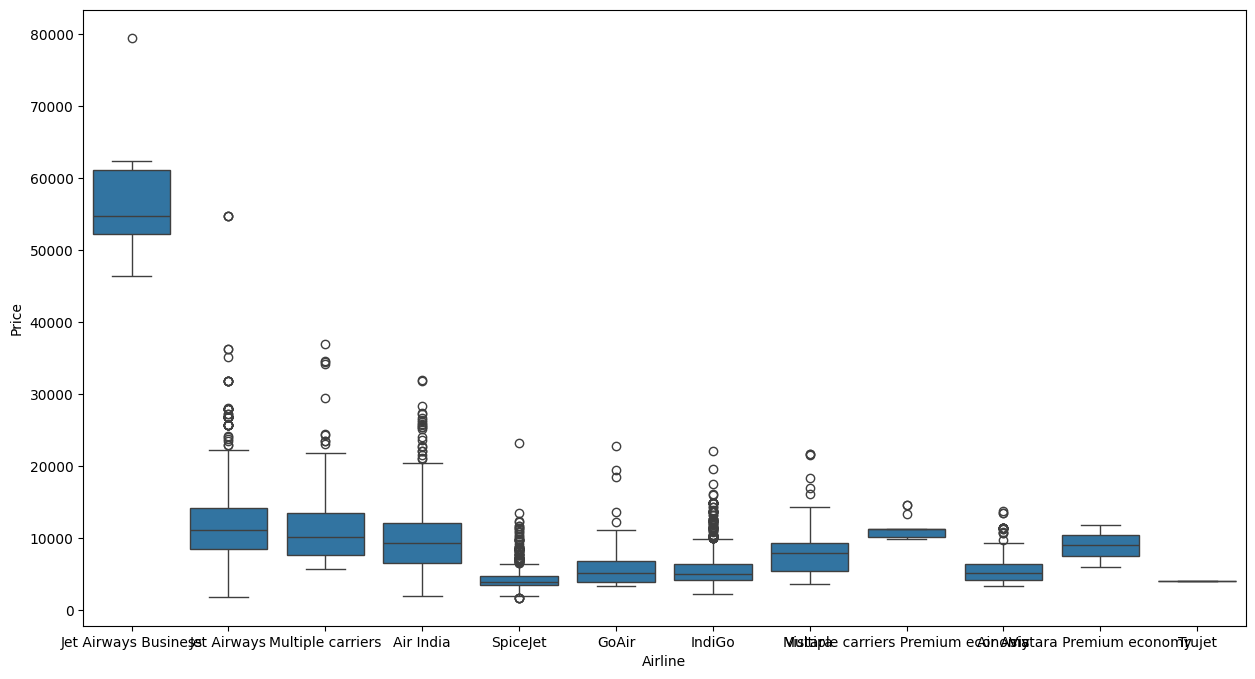

In [103]:
# plot boxplots of Airline vs Price
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

In [104]:
df['Source'].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2177
Mumbai       697
Chennai      381
Name: count, dtype: int64

<Figure size 1500x1500 with 0 Axes>

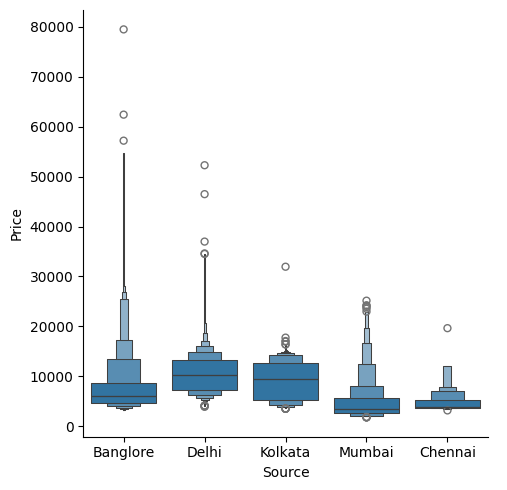

In [105]:
# Plot boxplots of Source vs Price
plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')

In [106]:
df['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     912
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<Axes: xlabel='Destination', ylabel='Price'>

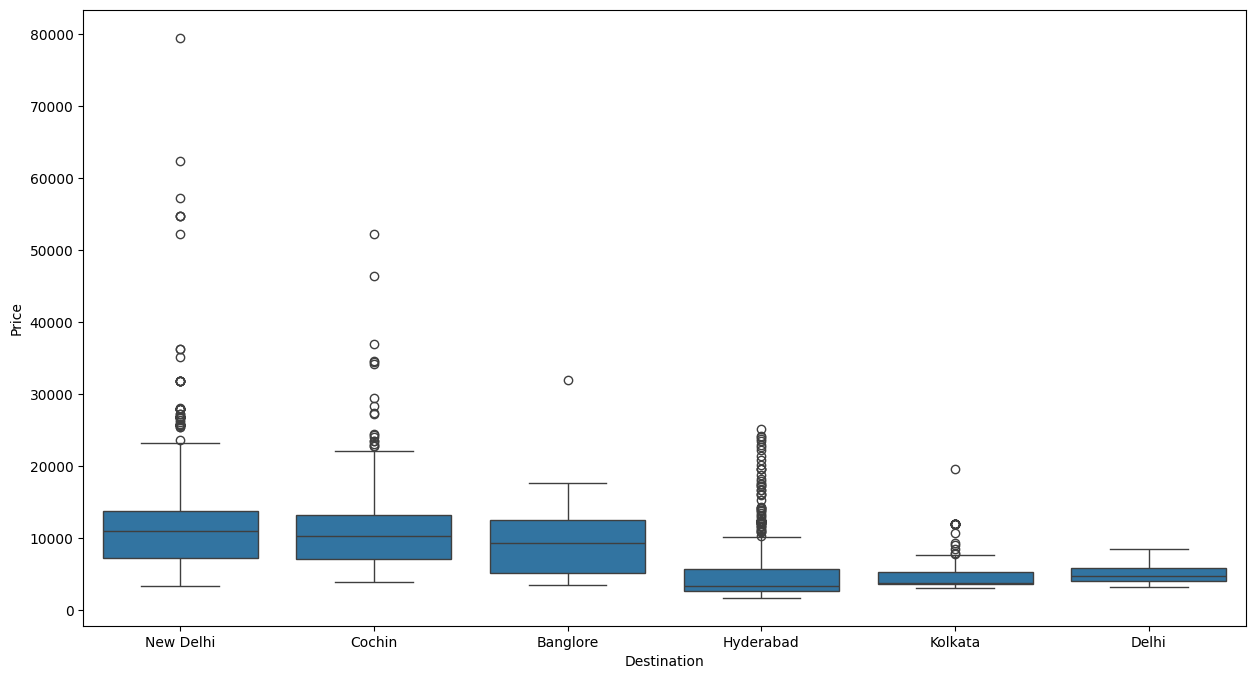

In [107]:
# Plot boxplots of Destination vs Price
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [108]:
# one hot encoding Airline column
Airline=pd.get_dummies(df['Airline'],drop_first=True, dtype=int)
print(Airline.head())

   Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       0            0                     1   
1          0      0       0            0                     1   
2          0      0       0            0                     1   
3          0      0       0            1                     0   
4          0      0       0            1                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   
3                  0                                  0         0       0   
4                  0                                  0         0       0   

   Vistara  Vistara Premium economy  
0        0                        0  
1        0                        0  
2        0                

In [109]:
# one hot encoding source column
Source=pd.get_dummies(df['Source'],drop_first=True, dtype=int)
print(Source.head())

   Chennai  Delhi  Kolkata  Mumbai
0        0      0        0       0
1        0      0        0       0
2        0      0        0       0
3        0      0        0       0
4        0      0        0       0


In [110]:
# one hot encoding destination column
Destination=pd.get_dummies(df['Destination'],drop_first=True, dtype=int)
print(Destination.head())

   Cochin  Delhi  Hyderabad  Kolkata  New Delhi
0       0      0          0        0          1
1       0      0          0        0          1
2       0      0          0        0          1
3       0      0          0        0          1
4       0      0          0        0          1


In [111]:
# examine route feature
df['Route'].value_counts()

Route
DEL → BOM → COK                2376
BLR → DEL                      1534
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → HBX → BOM → NAG → DEL       1
CCU → IXB → DEL → BLR             1
BOM → JAI → DEL → HYD             1
BOM → JLR → HYD                   1
BOM → NDC → HYD                   1
Name: count, Length: 128, dtype: int64

In [112]:
# split each route into seperate column
df['Route1']=df['Route'].str.split('→').str[0]
df['Route2']=df['Route'].str.split('→').str[1]
df['Route3']=df['Route'].str.split('→').str[2]
df['Route4']=df['Route'].str.split('→').str[3]
df['Route5']=df['Route'].str.split('→').str[4]

df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,dept_day,dept_month,dept_hour,...,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5
0,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,79512,1,3,5,...,3,11,25,5,40,BLR,BOM,DEL,NaN,NaN
1,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,62427,1,3,5,...,3,12,25,6,40,BLR,BOM,DEL,NaN,NaN
2,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,1 stop,Business class,57209,1,3,9,...,3,14,25,4,40,BLR,MAA,DEL,NaN,NaN
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,54826,18,3,18,...,3,0,45,6,5,BLR,BOM,DEL,NaN,NaN
4,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,54826,18,3,22,...,3,5,5,6,15,BLR,BOM,DEL,NaN,NaN


In [113]:
# drop route column
df.drop(columns=['Route'], axis=1, inplace=True)
print(df.head())

                Airline    Source Destination Total_Stops Additional_Info  \
0  Jet Airways Business  Banglore   New Delhi      1 stop  Business class   
1  Jet Airways Business  Banglore   New Delhi      1 stop  Business class   
2  Jet Airways Business  Banglore   New Delhi      1 stop  Business class   
3           Jet Airways  Banglore   New Delhi      1 stop         No info   
4           Jet Airways  Banglore   New Delhi      1 stop         No info   

   Price  dept_day  dept_month  dept_hour  dept_minute  ...  arrival_month  \
0  79512         1           3          5           45  ...              3   
1  62427         1           3          5           45  ...              3   
2  57209         1           3          9           45  ...              3   
3  54826        18           3         18           40  ...              3   
4  54826        18           3         22           50  ...              3   

   arrival_hour  arrival_minute  duration_hours  duration_minutes  R

In [114]:
df.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             0
Additional_Info         0
Price                   0
dept_day                0
dept_month              0
dept_hour               0
dept_minute             0
arrival_day             0
arrival_month           0
arrival_hour            0
arrival_minute          0
duration_hours          0
duration_minutes        0
Route1                  0
Route2                  0
Route3               3473
Route4               9098
Route5              10416
dtype: int64

In [115]:
 # fill the Routes with NA with None
for i in ['Route3', 'Route4', 'Route5']:
    df[i].fillna('None',inplace=True)

In [116]:
# Check na again
df.isnull().sum() 

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Price               0
dept_day            0
dept_month          0
dept_hour           0
dept_minute         0
arrival_day         0
arrival_month       0
arrival_hour        0
arrival_minute      0
duration_hours      0
duration_minutes    0
Route1              0
Route2              0
Route3              0
Route4              0
Route5              0
dtype: int64

In [117]:
# Applying label encoder
# use label encoding since many categories for the routes
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']: # encode values into numbers
    df[i]=encoder.fit_transform(df[i])

df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,dept_day,dept_month,dept_hour,dept_minute,...,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5
0,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,79512,1,3,5,45,...,3,11,25,5,40,0,7,8,13,5
1,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,62427,1,3,5,45,...,3,12,25,6,40,0,7,8,13,5
2,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,57209,1,3,9,45,...,3,14,25,4,40,0,33,8,13,5
3,Jet Airways,Banglore,New Delhi,1 stop,No info,54826,18,3,18,40,...,3,0,45,6,5,0,7,8,13,5
4,Jet Airways,Banglore,New Delhi,1 stop,No info,54826,18,3,22,50,...,3,5,5,6,15,0,7,8,13,5


In [118]:
# examine total_stop column
df['Total_Stops'].unique()

array(['1 stop', '2 stops', 'non-stop', '3 stops', '4 stops'],
      dtype=object)

In [119]:
# since ordinal data, encode as number
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,dept_day,dept_month,dept_hour,dept_minute,...,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5
0,Jet Airways Business,Banglore,New Delhi,1,Business class,79512,1,3,5,45,...,3,11,25,5,40,0,7,8,13,5
1,Jet Airways Business,Banglore,New Delhi,1,Business class,62427,1,3,5,45,...,3,12,25,6,40,0,7,8,13,5
2,Jet Airways Business,Banglore,New Delhi,1,Business class,57209,1,3,9,45,...,3,14,25,4,40,0,33,8,13,5
3,Jet Airways,Banglore,New Delhi,1,No info,54826,18,3,18,40,...,3,0,45,6,5,0,7,8,13,5
4,Jet Airways,Banglore,New Delhi,1,No info,54826,18,3,22,50,...,3,5,5,6,15,0,7,8,13,5


In [120]:
# examine add_info column
print(df['Additional_Info'].unique())

['Business class' 'No info' '1 Long layover' '1 Short layover'
 '2 Long layover' 'Change airports' 'In-flight meal not included'
 'Red-eye flight' 'No Info' 'No check-in baggage included']


In [121]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8180
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: count, dtype: int64

<Figure size 5000x1500 with 0 Axes>

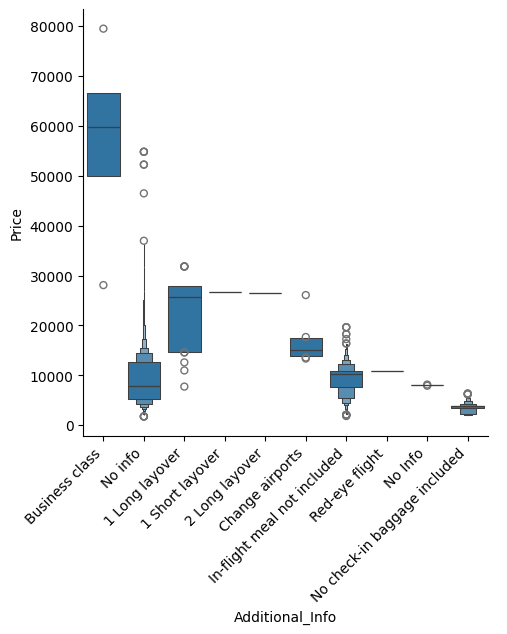

In [122]:
plt.figure(figsize=(50,15))

g = sns.catplot(x='Additional_Info',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')
g.set_xticklabels(rotation=45, ha="right")
plt.show()

In [123]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,dept_day,dept_month,dept_hour,dept_minute,...,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5
0,Jet Airways Business,Banglore,New Delhi,1,Business class,79512,1,3,5,45,...,3,11,25,5,40,0,7,8,13,5
1,Jet Airways Business,Banglore,New Delhi,1,Business class,62427,1,3,5,45,...,3,12,25,6,40,0,7,8,13,5
2,Jet Airways Business,Banglore,New Delhi,1,Business class,57209,1,3,9,45,...,3,14,25,4,40,0,33,8,13,5
3,Jet Airways,Banglore,New Delhi,1,No info,54826,18,3,18,40,...,3,0,45,6,5,0,7,8,13,5
4,Jet Airways,Banglore,New Delhi,1,No info,54826,18,3,22,50,...,3,5,5,6,15,0,7,8,13,5


In [124]:
# Lacking entries for some values in Additional_info and 'no info' doesn't specify, so also drop column Additional_Info
# Drop the other columns as needed
df.drop(columns=['Airline', 'Source', 'Destination', 'Additional_Info'], axis=1, inplace=True)
print(df.head())

   Total_Stops  Price  dept_day  dept_month  dept_hour  dept_minute  \
0            1  79512         1           3          5           45   
1            1  62427         1           3          5           45   
2            1  57209         1           3          9           45   
3            1  54826        18           3         18           40   
4            1  54826        18           3         22           50   

   arrival_day  arrival_month  arrival_hour  arrival_minute  duration_hours  \
0            1              3            11              25               5   
1            1              3            12              25               6   
2            1              3            14              25               4   
3           19              3             0              45               6   
4           19              3             5               5               6   

   duration_minutes  Route1  Route2  Route3  Route4  Route5  
0                40       0       7 

In [125]:
# concat back airline, source, destination
df=pd.concat([df,Airline,Source,Destination],axis=1)
df.head()

,Total_Stops,Price,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,79512,1,3,5,45,1,3,11,25,...,0,0,0,0,0,0,0,0,0,1
1,1,62427,1,3,5,45,1,3,12,25,...,0,0,0,0,0,0,0,0,0,1
2,1,57209,1,3,9,45,1,3,14,25,...,0,0,0,0,0,0,0,0,0,1
3,1,54826,18,3,18,40,19,3,0,45,...,0,0,0,0,0,0,0,0,0,1
4,1,54826,18,3,22,50,19,3,5,5,...,0,0,0,0,0,0,0,0,0,1


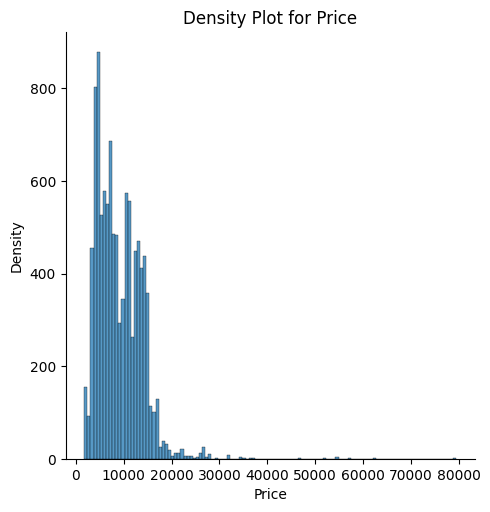

In [126]:
# check price for outliers
sns.displot(df['Price'])

# Add title and labels for clarity
plt.title('Density Plot for Price')
plt.xlabel('Price')
plt.ylabel('Density')

# Display the plot
plt.show()

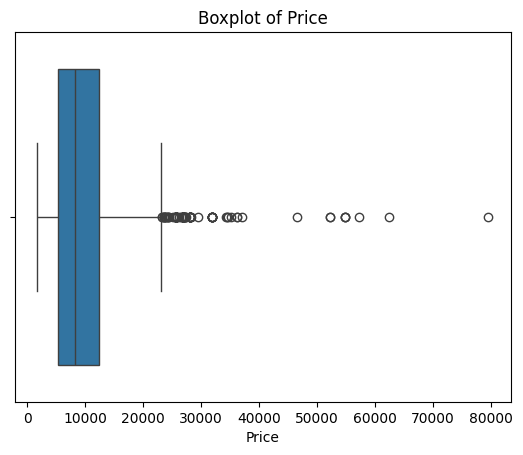

In [127]:
#boxplot
sns.boxplot(x=df["Price"])
plt.title("Boxplot of Price")
plt.show()

In [128]:
# Sort by highest price to examine outliers
high_price = df.sort_values(by='Price', ascending=False)
high_price.head(15)

,Total_Stops,Price,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,79512,1,3,5,45,1,3,11,25,...,0,0,0,0,0,0,0,0,0,1
1,1,62427,1,3,5,45,1,3,12,25,...,0,0,0,0,0,0,0,0,0,1
2,1,57209,1,3,9,45,1,3,14,25,...,0,0,0,0,0,0,0,0,0,1
3,1,54826,18,3,18,40,19,3,0,45,...,0,0,0,0,0,0,0,0,0,1
4,1,54826,18,3,22,50,19,3,5,5,...,0,0,0,0,0,0,0,0,0,1
5,1,54826,1,3,16,55,1,3,23,0,...,0,0,0,0,0,0,0,0,0,1
6,2,52285,6,3,20,5,7,3,4,25,...,0,0,1,0,0,1,0,0,0,0
7,1,52229,1,3,5,45,1,3,10,45,...,0,0,0,0,0,0,0,0,0,1
8,2,46490,3,3,20,5,4,3,4,25,...,0,0,1,0,0,1,0,0,0,0
9,1,36983,1,3,12,50,1,3,19,15,...,0,0,1,0,0,1,0,0,0,0


Only a few outliers and Substantial change in price until around 40000, so drop those above

In [129]:
df = df[df['Price'] <= 40000]

In [130]:
#View highest price again
high_price = df.sort_values(by='Price', ascending=False)
high_price.head(15)

,Total_Stops,Price,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
9,1,36983,1,3,12,50,1,3,19,15,...,0,0,1,0,0,1,0,0,0,0
11,1,36235,1,3,14,5,1,3,21,20,...,0,0,0,0,0,0,0,0,0,1
10,1,36235,1,3,14,5,1,3,19,10,...,0,0,0,0,0,0,0,0,0,1
12,1,35185,1,3,18,40,2,3,0,45,...,0,0,0,0,0,0,0,0,0,1
13,2,34608,9,3,15,5,10,3,1,35,...,0,0,1,0,0,1,0,0,0,0
14,2,34503,3,3,15,5,4,3,1,35,...,0,0,1,0,0,1,0,0,0,0
15,1,34273,9,5,12,50,10,5,1,30,...,0,0,1,0,0,1,0,0,0,0
16,0,31945,24,3,20,45,24,3,23,20,...,0,0,0,1,0,0,0,0,0,0
21,1,31825,1,3,22,50,2,3,11,25,...,0,0,0,0,0,0,0,0,0,1
22,1,31825,1,3,18,40,2,3,9,0,...,0,0,0,0,0,0,0,0,0,1


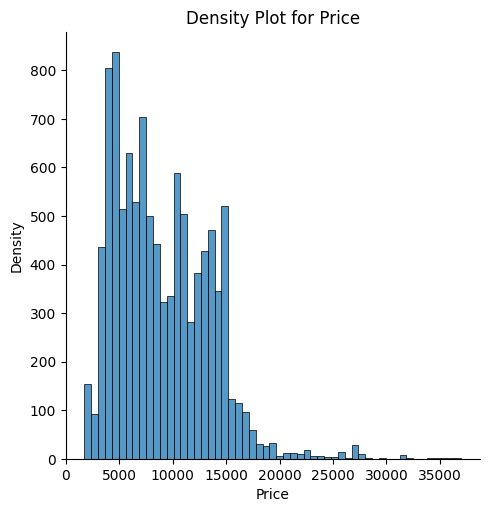

In [131]:

sns.displot(df['Price'])

# Add title and labels for clarity
plt.title('Density Plot for Price')
plt.xlabel('Price')
plt.ylabel('Density')

# Display the plot
plt.show()

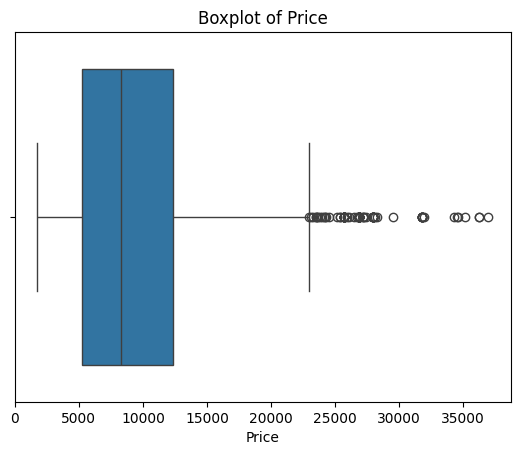

In [132]:
#boxplot
sns.boxplot(x=df["Price"])
plt.title("Boxplot of Price")
plt.show()

In [133]:
print(df.columns)

Index(['Total_Stops', 'Price', 'dept_day', 'dept_month', 'dept_hour',
       'dept_minute', 'arrival_day', 'arrival_month', 'arrival_hour',
       'arrival_minute', 'duration_hours', 'duration_minutes', 'Route1',
       'Route2', 'Route3', 'Route4', 'Route5', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')


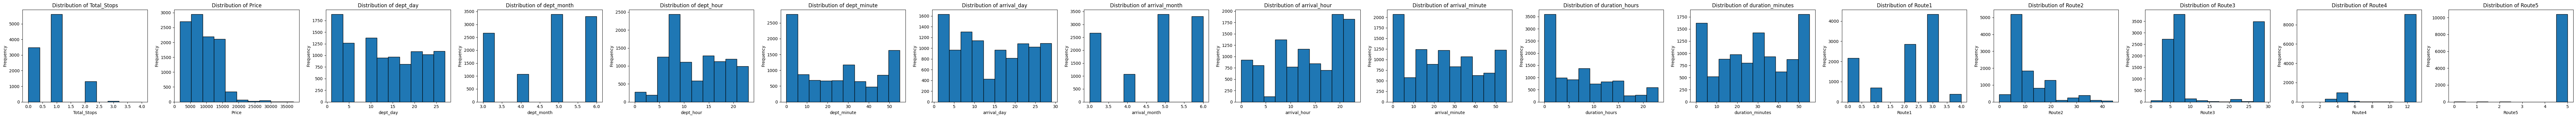

In [134]:
# Plot histograms for each column to determine distribution

columns_df = ['Total_Stops', 'Price', 'dept_day', 'dept_month', 'dept_hour',
       'dept_minute', 'arrival_day', 'arrival_month', 'arrival_hour',
       'arrival_minute', 'duration_hours', 'duration_minutes', 'Route1',
       'Route2', 'Route3', 'Route4', 'Route5']
num_cols = len(columns_df)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 4))

for i, col in enumerate(columns_df):
    axes[i].hist(df[col], bins=10, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Most of the columns do not follow clear normal dist and most have clear min max bounds so scale features Min Max

In [135]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
final_df = pd.DataFrame(scaled_df, columns=df.columns)
print(final_df)


       Total_Stops     Price  dept_day  dept_month  dept_hour  dept_minute  \
0             0.25  1.000000  0.000000    0.000000   0.521739     0.909091   
1             0.25  0.978764  0.000000    0.000000   0.608696     0.090909   
2             0.25  0.978764  0.000000    0.000000   0.608696     0.090909   
3             0.25  0.948955  0.000000    0.000000   0.782609     0.727273   
4             0.50  0.932574  0.307692    0.000000   0.652174     0.090909   
...            ...       ...       ...         ...        ...          ...   
10446         0.00  0.002300  1.000000    0.000000   0.086957     1.000000   
10447         0.00  0.000000  0.769231    0.000000   0.956522     0.818182   
10448         0.00  0.000000  1.000000    0.000000   0.956522     0.818182   
10449         0.00  0.000000  0.076923    0.333333   0.956522     0.818182   
10450         0.00  0.000000  1.000000    0.000000   0.217391     0.818182   

       arrival_day  arrival_month  arrival_hour  arrival_minute

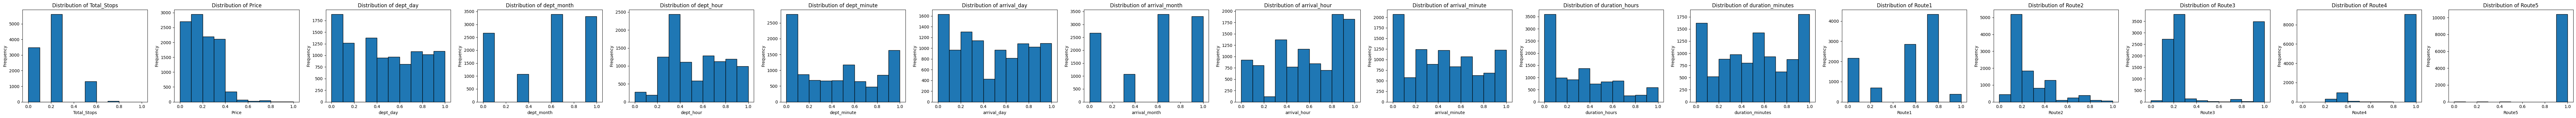

In [136]:
# Plot histograms for each column to see how distribution changed after scaling

columns_df = ['Total_Stops', 'Price', 'dept_day', 'dept_month', 'dept_hour',
       'dept_minute', 'arrival_day', 'arrival_month', 'arrival_hour',
       'arrival_minute', 'duration_hours', 'duration_minutes', 'Route1',
       'Route2', 'Route3', 'Route4', 'Route5']
num_cols = len(columns_df)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 4))

for i, col in enumerate(columns_df):
    axes[i].hist(final_df[col], bins=10, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [137]:
final_df.to_csv('after_scaling.csv', index=False)